In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df =pd.read_csv(r'C:\farouha\first inten project.csv')
print(df)

      Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3              

In [3]:
print("Null values in each column:\n", df.isnull().sum())

Null values in each column:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [4]:
print("Rows with null values:\n", df[df.isnull().any(axis=1)])

Rows with null values:
 Empty DataFrame
Columns: [Booking_ID, number of adults, number of children, number of weekend nights, number of week nights, type of meal, car parking space, room type, lead time, market segment type, repeated, P-C, P-not-C, average price , special requests, date of reservation, booking status]
Index: []


In [5]:
print(df.dtypes)

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [6]:
for column in df.select_dtypes(include=['object', 'float64', 'int64']).columns:
    print(f"Checking column: {column}")

    # Check for white spaces in object columns
    if df[column].dtype == 'object':
        white_space_rows = df[df[column].str.contains(r'^\s+|\s+$', na=False)]
    else:
        white_space_rows = df[df[column].astype(str).str.contains(r'^\s+|\s+$', na=False)]

    if not white_space_rows.empty:
        print(f"Found white spaces in column: {column}")
        print(white_space_rows)
    else:
        print(f"No white spaces found in column: {column}")

Checking column: Booking_ID
No white spaces found in column: Booking_ID
Checking column: number of adults
No white spaces found in column: number of adults
Checking column: number of children
No white spaces found in column: number of children
Checking column: number of weekend nights
No white spaces found in column: number of weekend nights
Checking column: number of week nights
No white spaces found in column: number of week nights
Checking column: type of meal
No white spaces found in column: type of meal
Checking column: car parking space
No white spaces found in column: car parking space
Checking column: room type
No white spaces found in column: room type
Checking column: lead time
No white spaces found in column: lead time
Checking column: market segment type
No white spaces found in column: market segment type
Checking column: repeated
No white spaces found in column: repeated
Checking column: P-C
No white spaces found in column: P-C
Checking column: P-not-C
No white spaces fou

In [7]:
df.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price   special requests  
count  36285.000000  36285.000000    36285.000000      36285.000000  
mean       0.023343      0.153369      103.421636          0.619733  
std        0.368281      1.753931       35.086469          0.786262  
min        0.000000      0.000000        0.000000          0.000000  
25%        0.000000      0.000000       80.300000          0.000000  
50%        0.000000      0.000000       99.450000          0.000000  
75%        0.000000      0.000000      120.000000          1.000000  
max       13.000000     58.000000      540.000000          5.000000

In [8]:
def plot_boxplots(df, columns, palette='rainbow', orient='h'):
    for column in columns:
        if column in df.columns:
            sns.boxplot(x=df[column], palette=palette, orient=orient)
            plt.title(f'Boxplot of {column}')
            plt.show()
        else:
            print(f"Column '{column}' does not exist in the DataFrame")

columns_to_plot = [
    'number of adults', 'number of children', 'number of weekend nights',
    'number of week nights', 'car parking space', 'lead time',
    'repeated', 'P-C', 'P-not-C', 'special requests',
]

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


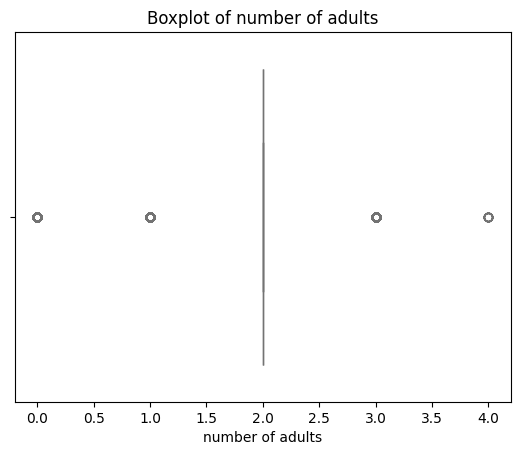

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


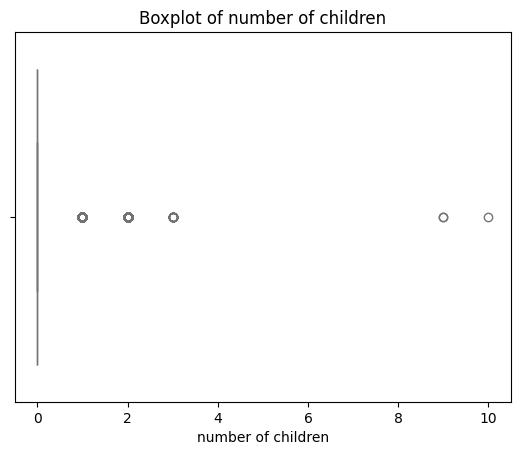

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


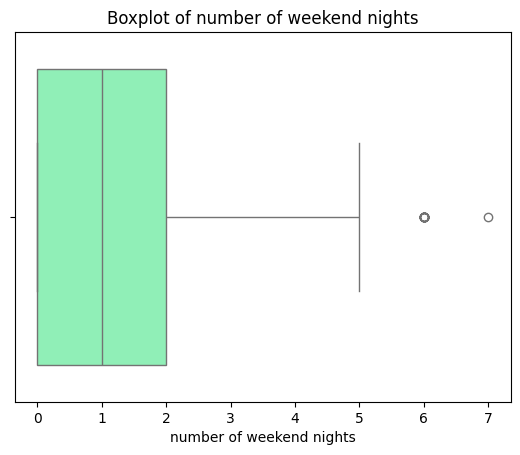

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


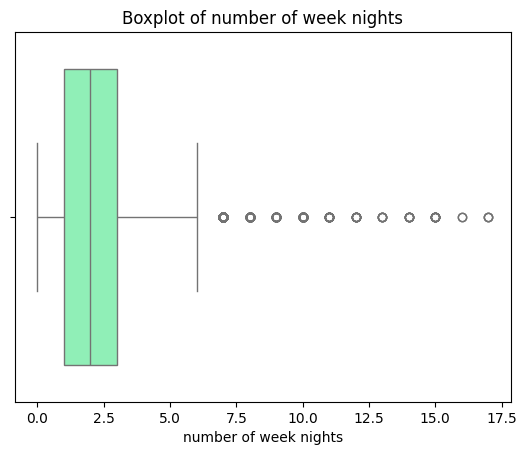

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


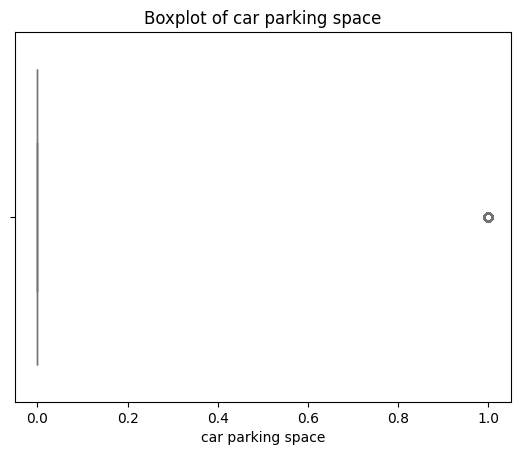

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


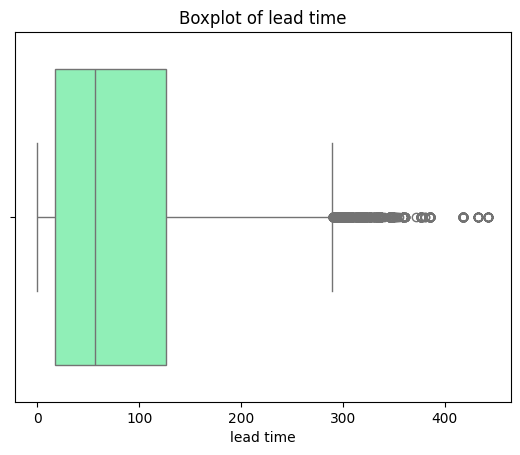

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


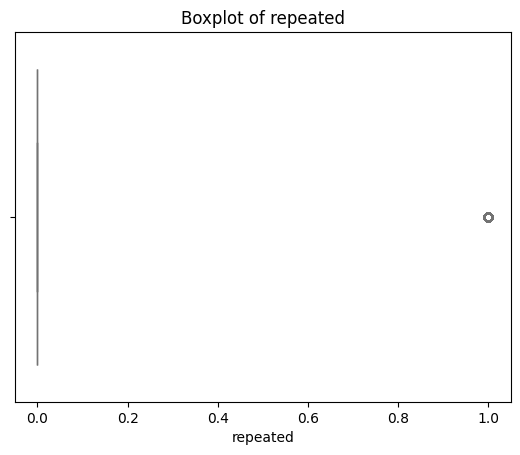

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


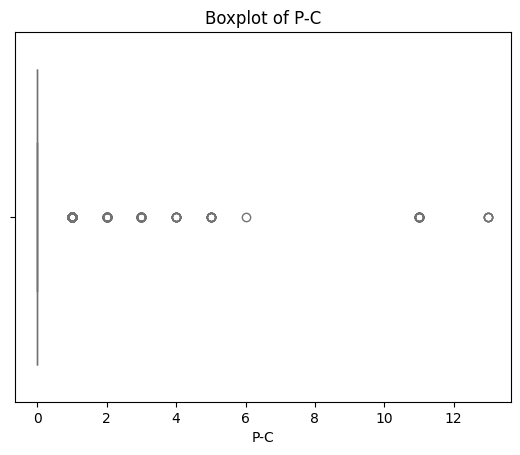

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


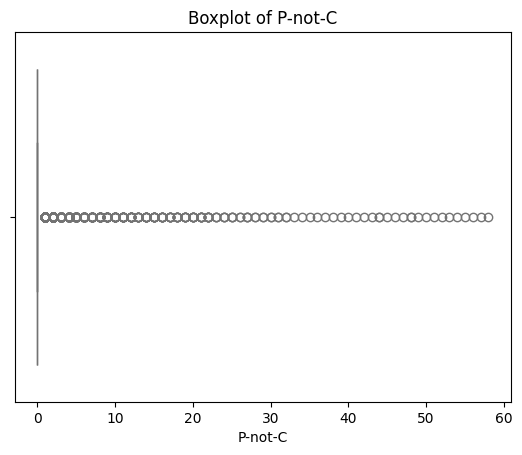

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\3324343661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette=palette, orient=orient)


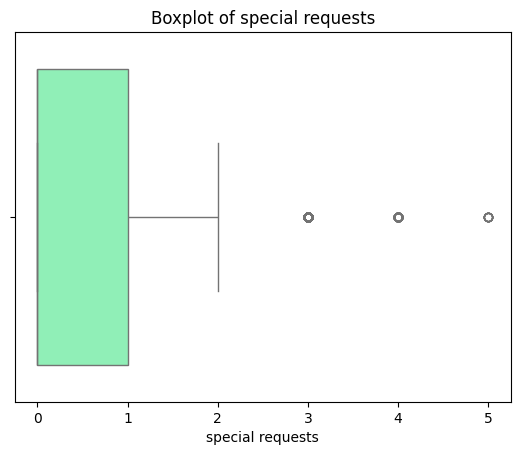

In [9]:
plot_boxplots(df, columns_to_plot)

In [10]:
outliers = pd.DataFrame()
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers_in_column.empty:
        outliers = pd.concat([outliers, outliers_in_column])

# Remove duplicate rows in the outliers DataFrame
outliers = outliers.drop_duplicates()

# Print the outliers
print("Outliers detected using IQR method:")
print(outliers)

Outliers detected using IQR method:
      Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
5       INN00006                 1                   0   
...          ...               ...                 ...   
34981   INN34982                 2                   0   
35309   INN35310                 2                   0   
35348   INN35349                 2                   0   
35424   INN35425                 2                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
3                             0                    

In [11]:
df_cleaned = df.drop(outliers.index)

print("Data after removing outliers:")
print(df_cleaned)

Data after removing outliers:
      Booking_ID  number of adults  number of children  \
12      INN00013                 2                   0   
14      INN00015                 2                   0   
15      INN00016                 2                   0   
17      INN00018                 2                   0   
18      INN00019                 2                   0   
...          ...               ...                 ...   
36276   INN36277                 2                   0   
36278   INN36279                 2                   0   
36279   INN36281                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
12                            2                      1  Not Selected   
14                            0                      2   Meal Plan 1   
15                            0                      2   

In [12]:
df_cleaned['type of meal'] = df_cleaned['type of meal'].replace({
    "Not Selected": 0,
    "Meal Plan 1": 1,
    "Meal Plan 2": 2,
    "Meal Plan 3": 3
})
df_cleaned['room type'] = df_cleaned['room type'].replace({
    "Room_Type 1": 1,
    "Room_Type 2": 2,
    "Room_Type 3": 3,
    "Room_Type 4": 4,
    "Room_Type 5": 5,
    "Room_Type 6": 6,
    "Room_Type 7": 7
})
df_cleaned['market segment type'] = df_cleaned['market segment type'].replace({
    "Online": 1,
    "Offline": 2,
    "Aviation": 0,
    "Corporate": 3,
    "Complementary": 4
})
df_cleaned['booking status'] = df_cleaned['booking status'].replace({
    "Not_Canceled": 1,
    "Canceled": 0
})

df_cleaned['Total Guests'] = df_cleaned['number of adults'] + df_cleaned['number of children']
df_cleaned['Length of Stay'] = df_cleaned['number of week nights'] + df_cleaned['number of weekend nights']

columns_to_drop = ['Booking_ID', 'number of adults', 'number of children', 'number of week nights', 'number of weekend nights']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, axis=1)

df_cleaned['date of reservation'] = pd.to_datetime(df_cleaned['date of reservation'], format='%m/%d/%Y', errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['date of reservation'])

df_cleaned['reservation_month'] = df_cleaned['date of reservation'].dt.month
df_cleaned['reservation_day'] = df_cleaned['date of reservation'].dt.day
df_cleaned['reservation_weekday'] = df_cleaned['date of reservation'].dt.day_name()
df_cleaned['reservation_year'] = df_cleaned['date of reservation'].dt.year

df_cleaned['reservation_weekday'] = df_cleaned['reservation_weekday'].replace({
    "Sunday": 0,
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6
})

C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\2182203201.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['type of meal'] = df_cleaned['type of meal'].replace({
C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\2182203201.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['room type'] = df_cleaned['room type'].replace({
C:\Users\Farha\AppData\Local\Temp\ipykernel_21148\2182203201.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

In [13]:
print(df.dtypes)

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


lead time              0.119873
average price          0.089258
special requests       0.037887
reservation_month      0.025944
reservation_year       0.013269
market segment type    0.006076
reservation_weekday    0.004915
Total Guests           0.004059
type of meal           0.003846
repeated               0.002310
P-not-C                0.002123
car parking space      0.001959
reservation_day        0.001527
room type              0.000000
P-C                    0.000000
Length of Stay         0.000000
dtype: float64


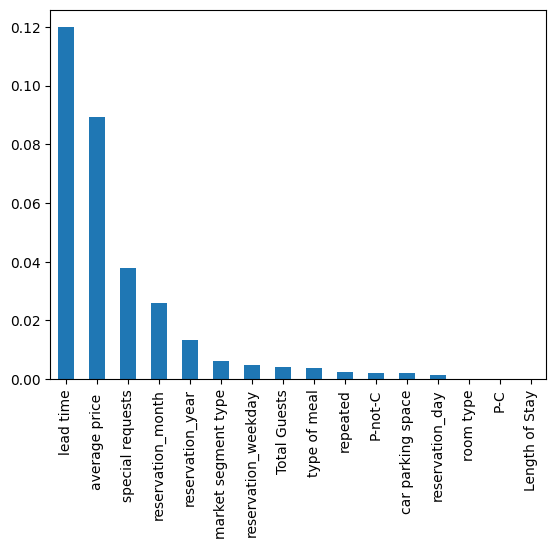

Selected top features to work with:
Index(['lead time', 'average price ', 'special requests', 'reservation_month',
       'reservation_year', 'market segment type', 'reservation_weekday',
       'Total Guests', 'type of meal', 'repeated'],
      dtype='object')


In [14]:
# Feature selection
X = df_cleaned.drop(['booking status', 'date of reservation'], axis=1)
y = df_cleaned['booking status']

selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)

feature_scores = pd.Series(selector.scores_, index=X.columns)
feature_scores.sort_values(ascending=False, inplace=True)
print(feature_scores)

feature_scores.plot(kind='bar')
plt.show()

top_k_features = feature_scores.nlargest(10).index
X_selected = X[top_k_features]
print("Selected top features to work with:")
print(top_k_features)

In [15]:
df_encoded = pd.get_dummies(df_cleaned, columns=['market segment type','type of meal','reservation_weekday','room type'])

X = df_encoded.drop('booking status', axis=1)
y = df_encoded['booking status']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Train and test data prepared:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Train and test data prepared:
X_train shape: (16645, 10)
X_test shape: (4162, 10)
y_train shape: (16645,)
y_test shape: (4162,)


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.786641037962518
[[ 772  605]
 [ 283 2502]]
              precision    recall  f1-score   support

           0       0.73      0.56      0.63      1377
           1       0.81      0.90      0.85      2785

    accuracy                           0.79      4162
   macro avg       0.77      0.73      0.74      4162
weighted avg       0.78      0.79      0.78      4162



c:\Users\Farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'random_state': [42]                       # Typically fixed for reproducibility
}
# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found by Grid Search: ", grid_search.best_params_)
print("Best accuracy found by Grid Search: ", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(X_test)

# Calculate and print accuracy
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Accuracy on test data using Grid Search: ", accuracy_grid)

# Print classification report and confusion matrix
print("Classification Report (Grid Search):\n", classification_report(y_test, y_pred_grid))
print("Confusion Matrix (Grid Search):\n", confusion_matrix(y_test, y_pred_grid))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found by Grid Search:  {'min_samples_leaf': 1, 'n_estimators': 150, 'random_state': 42}
Best accuracy found by Grid Search:  0.8766596575548211
Accuracy on test data using Grid Search:  0.8755406054781355
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1377
           1       0.89      0.93      0.91      2785

    accuracy                           0.88      4162
   macro avg       0.87      0.85      0.86      4162
weighted avg       0.87      0.88      0.87      4162

Confusion Matrix (Grid Search):
 [[1064  313]
 [ 205 2580]]


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier()
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=300, num=10)],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'random_state': [42]
}

# Initialize RandomizedSearchCV with the RandomForestClassifier and parameter distribution
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found by Randomized Search: ", random_search.best_params_)
print("Best accuracy found by Randomized Search: ", random_search.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)

# Calculate and print accuracy
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Accuracy on test data using Randomized Search: ", accuracy_random)

# Print classification report and confusion matrix
print("Classification Report (Randomized Search):\n", classification_report(y_test, y_pred_random))
print("Confusion Matrix (Randomized Search):\n", confusion_matrix(y_test, y_pred_random))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by Randomized Search:  {'random_state': 42, 'n_estimators': 272, 'min_samples_leaf': 1}
Best accuracy found by Randomized Search:  0.8771402823670773
Accuracy on test data using Randomized Search:  0.8762614127823162
Classification Report (Randomized Search):
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1377
           1       0.89      0.93      0.91      2785

    accuracy                           0.88      4162
   macro avg       0.87      0.85      0.86      4162
weighted avg       0.87      0.88      0.87      4162

Confusion Matrix (Randomized Search):
 [[1062  315]
 [ 200 2585]]


RandomForest Classifier

Feature Scores based on RandomForest Classifier:
lead time              0.329713
average price          0.163069
special requests       0.096856
reservation_day        0.092087
reservation_month      0.085410
Length of Stay         0.060679
reservation_weekday    0.055799
market segment type    0.055537
type of meal           0.024469
reservation_year       0.020494
room type              0.015887
car parking space      0.000000
P-not-C                0.000000
P-C                    0.000000
repeated               0.000000
Total Guests           0.000000
dtype: float64


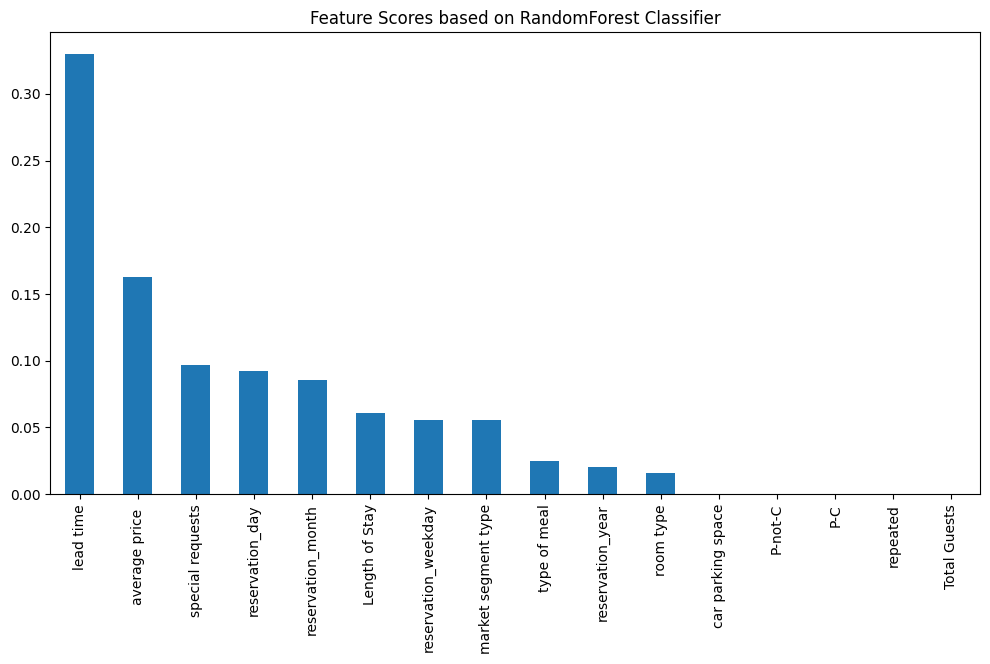

Selected top features to work with:
Index(['lead time', 'average price ', 'special requests', 'reservation_day',
       'reservation_month', 'Length of Stay', 'reservation_weekday',
       'market segment type', 'type of meal', 'reservation_year'],
      dtype='object')


In [19]:
from sklearn.ensemble import RandomForestClassifier

def select_features_random_forest(df, target, k='all'):
    # Drop the 'date of reservation' column before creating X
    X = df.drop([target, 'date of reservation'], axis=1)
    y = df[target]

    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    feature_scores = pd.Series(model.feature_importances_, index=X.columns)
    feature_scores.sort_values(ascending=False, inplace=True)

    print("Feature Scores based on RandomForest Classifier:")
    print(feature_scores)

    feature_scores.plot(kind='bar', figsize=(12, 6))
    plt.title('Feature Scores based on RandomForest Classifier')
    plt.show()

    if k != 'all':
        top_k_features = feature_scores.nlargest(k).index
        X_selected = X[top_k_features]
        print("Selected top features to work with:")
        print(top_k_features)
        return X_selected
    else:
        return X

# Example usage
X_selected_rf = select_features_random_forest(df_cleaned, 'booking status', k=10)

In [20]:
df_encoded = pd.get_dummies(df_cleaned, columns=['market segment type','type of meal','reservation_weekday','room type'])

X1 = df_encoded.drop('booking status', axis=1)
y1 = df_encoded['booking status']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_selected_rf, y, test_size=0.2, random_state=42)

print("Train and test data prepared:")
print("X_train shape:", X_train1.shape)
print("X_test shape:", X_test1.shape)
print("y_train shape:", y_train1.shape)
print("y_test shape:", y_test1.shape)

Train and test data prepared:
X_train shape: (16645, 10)
X_test shape: (4162, 10)
y_train shape: (16645,)
y_test shape: (4162,)


In [21]:
model = LogisticRegression()
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)


print(accuracy_score(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

0.7676597789524268
[[ 693  684]
 [ 283 2502]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      1377
           1       0.79      0.90      0.84      2785

    accuracy                           0.77      4162
   macro avg       0.75      0.70      0.71      4162
weighted avg       0.76      0.77      0.76      4162



c:\Users\Farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'random_state': [42]
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search1 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search1.fit(X_train1, y_train1)

# Print the best parameters and the best score
print("Best parameters found by Grid Search: ", grid_search1.best_params_)
print("Best accuracy found by Grid Search: ", grid_search1.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_grid1 = grid_search1.best_estimator_
y_pred_grid1 = best_rf_grid1.predict(X_test1)

# Calculate and print accuracy
accuracy_grid1 = accuracy_score(y_test1, y_pred_grid1)
print("Accuracy on test data using Grid Search: ", accuracy_grid1)

# Print classification report and confusion matrix
print("Classification Report (Grid Search):\n", classification_report(y_test1, y_pred_grid1))
print("Confusion Matrix (Grid Search):\n", confusion_matrix(y_test1, y_pred_grid1))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found by Grid Search:  {'min_samples_leaf': 1, 'n_estimators': 150, 'random_state': 42}
Best accuracy found by Grid Search:  0.8865124662060679
Accuracy on test data using Grid Search:  0.8762614127823162
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1377
           1       0.89      0.93      0.91      2785

    accuracy                           0.88      4162
   macro avg       0.87      0.85      0.86      4162
weighted avg       0.87      0.88      0.87      4162

Confusion Matrix (Grid Search):
 [[1061  316]
 [ 199 2586]]


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier()
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=300, num=10)],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'random_state': [42]
}

# Initialize RandomizedSearchCV with the RandomForestClassifier and parameter distribution
random_search1 = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV to the data
random_search1.fit(X_train1, y_train1)

# Print the best parameters and the best score
print("Best parameters found by Randomized Search: ", random_search1.best_params_)
print("Best accuracy found by Randomized Search: ", random_search1.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_random1 = random_search1.best_estimator_
y_pred_random1 = best_rf_random1.predict(X_test1)

# Calculate and print accuracy
accuracy_random1 = accuracy_score(y_test1, y_pred_random1)
print("Accuracy on test data using Randomized Search: ", accuracy_random1)

# Print classification report and confusion matrix
print("Classification Report (Randomized Search):\n", classification_report(y_test1, y_pred_random1))
print("Confusion Matrix (Randomized Search):\n", confusion_matrix(y_test1, y_pred_random1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

MutualInformation

Feature Scores based on Mutual Information:
lead time              0.119228
average price          0.086033
special requests       0.039301
reservation_month      0.026142
reservation_year       0.015002
market segment type    0.009215
reservation_day        0.003087
room type              0.002031
Total Guests           0.001910
repeated               0.000780
P-C                    0.000358
car parking space      0.000000
P-not-C                0.000000
type of meal           0.000000
Length of Stay         0.000000
reservation_weekday    0.000000
dtype: float64


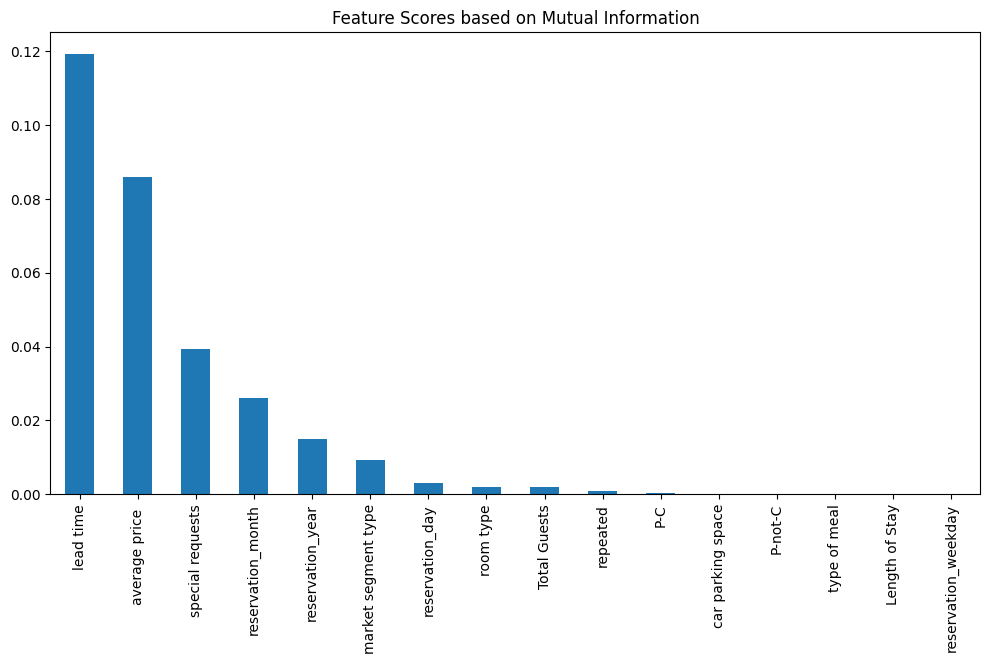

Selected top features to work with:
Index(['lead time', 'average price ', 'special requests', 'reservation_month',
       'reservation_year', 'market segment type', 'reservation_day',
       'room type', 'Total Guests', 'repeated'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def select_features_mutual_info(df, target, k='all'):
    # Drop the 'date of reservation' column before feature selection
    X = df.drop([target, 'date of reservation'], axis=1)  # Drop 'date of reservation'
    y = df[target]

    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    selector.fit(X, y)

    feature_scores = pd.Series(selector.scores_, index=X.columns)
    feature_scores.sort_values(ascending=False, inplace=True)

    print("Feature Scores based on Mutual Information:")
    print(feature_scores)

    feature_scores.plot(kind='bar', figsize=(12, 6))
    plt.title('Feature Scores based on Mutual Information')
    plt.show()

    if k != 'all':
        top_k_features = feature_scores.nlargest(k).index
        X_selected = X[top_k_features]
        print("Selected top features to work with:")
        print(top_k_features)
        return X_selected
    else:
        return X

# Example usage
X_selected_mi = select_features_mutual_info(df_cleaned, 'booking status', k=10)


In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['market segment type','type of meal','reservation_weekday','room type'])

X2 = df_encoded.drop('booking status', axis=1)
y2 = df_encoded['booking status']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected_mi, y, test_size=0.2, random_state=42)

print("Train and test data prepared:")
print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)
print("y_train shape:", y_train2.shape)
print("y_test shape:", y_test2.shape)

Train and test data prepared:
X_train shape: (16645, 10)
X_test shape: (4162, 10)
y_train shape: (16645,)
y_test shape: (4162,)


In [ ]:
model = LogisticRegression()
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)


print(accuracy_score(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

0.7873618452666987
[[ 795  582]
 [ 303 2482]]
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      1377
           1       0.81      0.89      0.85      2785

    accuracy                           0.79      4162
   macro avg       0.77      0.73      0.75      4162
weighted avg       0.78      0.79      0.78      4162



c:\Users\Farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'random_state': [42]
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search2.fit(X_train2, y_train2)

# Print the best parameters and the best score
print("Best parameters found by Grid Search: ", grid_search2.best_params_)
print("Best accuracy found by Grid Search: ", grid_search2.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_grid2 = grid_search2.best_estimator_
y_pred_grid2 = best_rf_grid2.predict(X_test2)

# Calculate and print accuracy
accuracy_grid2 = accuracy_score(y_test2, y_pred_grid2)
print("Accuracy on test data using Grid Search: ", accuracy_grid2)

# Print classification report and confusion matrix
print("Classification Report (Grid Search):\n", classification_report(y_test2, y_pred_grid2))
print("Confusion Matrix (Grid Search):\n", confusion_matrix(y_test2, y_pred_grid2))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found by Grid Search:  {'min_samples_leaf': 1, 'n_estimators': 250, 'random_state': 42}
Best accuracy found by Grid Search:  0.8810453589666565
Accuracy on test data using Grid Search:  0.871456030754445
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      1377
           1       0.89      0.93      0.91      2785

    accuracy                           0.87      4162
   macro avg       0.86      0.84      0.85      4162
weighted avg       0.87      0.87      0.87      4162

Confusion Matrix (Grid Search):
 [[1050  327]
 [ 208 2577]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier()
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=300, num=10)],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'random_state': [42]
}

# Initialize RandomizedSearchCV with the RandomForestClassifier and parameter distribution
random_search2 = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV to the data
random_search2.fit(X_train2, y_train2)

# Print the best parameters and the best score
print("Best parameters found by Randomized Search: ", random_search2.best_params_)
print("Best accuracy found by Randomized Search: ", random_search2.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_random2 = random_search2.best_estimator_
y_pred_random2 = best_rf_random2.predict(X_test2)

# Calculate and print accuracy
accuracy_random2 = accuracy_score(y_test2, y_pred_random2)
print("Accuracy on test data using Randomized Search: ", accuracy_random2)

# Print classification report and confusion matrix
print("Classification Report (Randomized Search):\n", classification_report(y_test2, y_pred_random2))
print("Confusion Matrix (Randomized Search):\n", confusion_matrix(y_test2, y_pred_random2))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by Randomized Search:  {'random_state': 42, 'n_estimators': 272, 'min_samples_leaf': 1}
Best accuracy found by Randomized Search:  0.8814058275758487
Accuracy on test data using Randomized Search:  0.8709754925516578
Classification Report (Randomized Search):
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      1377
           1       0.89      0.92      0.91      2785

    accuracy                           0.87      4162
   macro avg       0.86      0.84      0.85      4162
weighted avg       0.87      0.87      0.87      4162

Confusion Matrix (Randomized Search):
 [[1050  327]
 [ 210 2575]]


Chi-SquareTest

Feature Scores based on Chi-Square Test:
lead time              2.549115e+05
average price          1.666975e+03
special requests       1.112437e+03
market segment type    5.738428e+01
reservation_weekday    3.885133e+01
reservation_month      3.422836e+01
reservation_day        1.105152e+01
Length of Stay         3.906490e+00
room type              3.397338e-01
type of meal           1.810352e-01
reservation_year       3.808545e-02
Total Guests           2.375932e-28
car parking space               NaN
repeated                        NaN
P-C                             NaN
P-not-C                         NaN
dtype: float64


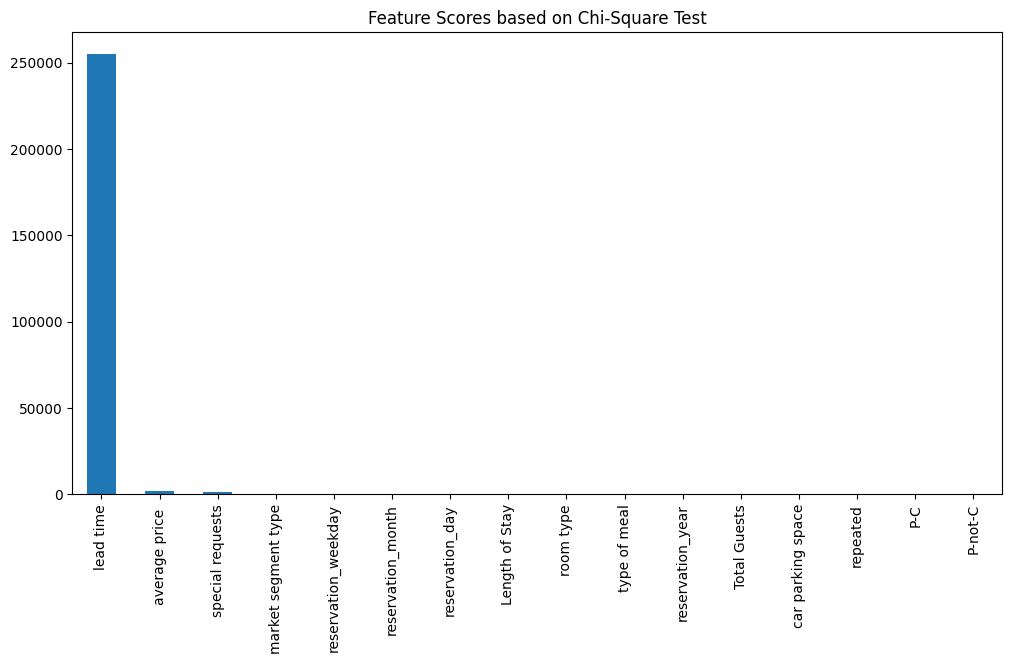

Selected top features to work with:
Index(['lead time', 'average price ', 'special requests',
       'market segment type', 'reservation_weekday', 'reservation_month',
       'reservation_day', 'Length of Stay', 'room type', 'type of meal'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

def select_features_chi2(df, target, k='all'):
    # Drop the target and any datetime columns
    X = df.drop([target, 'date of reservation'], axis=1)  # Explicitly drop 'date of reservation'
    y = df[target]

    selector = SelectKBest(score_func=chi2, k=k)
    selector.fit(X, y)

    feature_scores = pd.Series(selector.scores_, index=X.columns)
    feature_scores.sort_values(ascending=False, inplace=True)

    print("Feature Scores based on Chi-Square Test:")
    print(feature_scores)

    feature_scores.plot(kind='bar', figsize=(12, 6))
    plt.title('Feature Scores based on Chi-Square Test')
    plt.show()

    if k != 'all':
        top_k_features = feature_scores.nlargest(k).index
        X_selected = X[top_k_features]
        print("Selected top features to work with:")
        print(top_k_features)
        return X_selected
    else:
        return X

# Example usage
X_selected_chi2 = select_features_chi2(df_cleaned, 'booking status', k=10)


In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['market segment type','type of meal','reservation_weekday','room type'])

X3 = df_encoded.drop('booking status', axis=1)
y3 = df_encoded['booking status']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_selected_chi2, y, test_size=0.2, random_state=42)

print("Train and test data prepared:")
print("X_train shape:", X_train3.shape)
print("X_test shape:", X_test3.shape)
print("y_train shape:", y_train3.shape)
print("y_test shape:", y_test3.shape)

Train and test data prepared:
X_train shape: (16645, 10)
X_test shape: (4162, 10)
y_train shape: (16645,)
y_test shape: (4162,)


In [ ]:
model = LogisticRegression()
model.fit(X_train3, y_train3)
y_pred3 = model.predict(X_test3)


print(accuracy_score(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

0.7856799615569438
[[ 789  588]
 [ 304 2481]]
              precision    recall  f1-score   support

           0       0.72      0.57      0.64      1377
           1       0.81      0.89      0.85      2785

    accuracy                           0.79      4162
   macro avg       0.77      0.73      0.74      4162
weighted avg       0.78      0.79      0.78      4162



c:\Users\Farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'random_state': [42]
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search3.fit(X_train3, y_train3)

# Print the best parameters and the best score
print("Best parameters found by Grid Search: ", grid_search3.best_params_)
print("Best accuracy found by Grid Search: ", grid_search3.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_grid3 = grid_search3.best_estimator_
y_pred_grid3 = best_rf_grid3.predict(X_test3)

# Calculate and print accuracy
accuracy_grid3 = accuracy_score(y_test3, y_pred_grid3)
print("Accuracy on test data using Grid Search: ", accuracy_grid3)

# Print classification report and confusion matrix
print("Classification Report (Grid Search):\n", classification_report(y_test3, y_pred_grid3))
print("Confusion Matrix (Grid Search):\n", confusion_matrix(y_test3, y_pred_grid3))



Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found by Grid Search:  {'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 42}
Best accuracy found by Grid Search:  0.8843496545509162
Accuracy on test data using Grid Search:  0.8738587217683805
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1377
           1       0.89      0.93      0.91      2785

    accuracy                           0.87      4162
   macro avg       0.86      0.85      0.85      4162
weighted avg       0.87      0.87      0.87      4162

Confusion Matrix (Grid Search):
 [[1055  322]
 [ 203 2582]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn = KNeighborsClassifier()
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=300, num=10)],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'random_state': [42]
}

# Initialize RandomizedSearchCV with the RandomForestClassifier and parameter distribution
random_search3 = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV to the data
random_search3.fit(X_train3, y_train3)

# Print the best parameters and the best score
print("Best parameters found by Randomized Search: ", random_search3.best_params_)
print("Best accuracy found by Randomized Search: ", random_search3.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_random3 = random_search3.best_estimator_
y_pred_random3 = best_rf_random3.predict(X_test3)

# Calculate and print accuracy
accuracy_random3 = accuracy_score(y_test3, y_pred_random3)
print("Accuracy on test data using Randomized Search: ", accuracy_random3)

# Print classification report and confusion matrix
print("Classification Report (Randomized Search):\n", classification_report(y_test3, y_pred_random3))
print("Confusion Matrix (Randomized Search):\n", confusion_matrix(y_test3, y_pred_random3))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by Randomized Search:  {'random_state': 42, 'n_estimators': 133, 'min_samples_leaf': 1}
Best accuracy found by Randomized Search:  0.8843496545509162
Accuracy on test data using Randomized Search:  0.875300336376742
Classification Report (Randomized Search):
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1377
           1       0.89      0.93      0.91      2785

    accuracy                           0.88      4162
   macro avg       0.87      0.85      0.86      4162
weighted avg       0.87      0.88      0.87      4162

Confusion Matrix (Randomized Search):
 [[1051  326]
 [ 193 2592]]


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train the model
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train1, y_train1)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved using pickle.")

# Load the model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded using pickle.")

# Verify that the loaded model works
y_pred = loaded_model.predict(X_test1)
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy of the loaded model:", accuracy)


Model saved using pickle.
Model loaded using pickle.
Accuracy of the loaded model: 0.7676597789524268
